In [1]:
%matplotlib inline
from __future__ import print_function, division
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

In [2]:
import sys, os
import itertools
import datetime as dt
from functools import partial
import numpy as np
import shapely.ops
from shapely.geometry import box
from descartes import PolygonPatch
import pandas as pd
import geopandas as gp

In [3]:
import seaborn as sns
sns.set_context("poster")

Load global hotspot product data.

In [4]:
firehotspots = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/activefiremaps.fs.fed.us_data_fireptdata/"
mod14dir = "modis_fire_2015_344_ak_shapefile"
mod14shp = "modis_fire_2015_344_ak_AKAlbers.shp"
viirsIdir = "viirs_iband_fire_2015_344_ak_shapefile"
viirsIshp = "viirs_iband_fire_2015_344_ak_AKAlbers.shp"

In [5]:
mod14DF = gp.GeoDataFrame.from_file(os.path.join(firehotspots, mod14dir, mod14shp))
viirsIDF = gp.GeoDataFrame.from_file(os.path.join(firehotspots, viirsIdir, viirsIshp))

Load processed fire perimetes with pixel counts.

In [6]:
datadir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/GISout/"
cleanedfireperimDF = gp.GeoDataFrame.from_file(os.path.join(datadir, "cleanedFirePerimsWithFirepoints20160228.json"))
cleanedfireperimDF['blacksprucefire'] = cleanedfireperimDF['PRIMARYFUE'] == "Black Spruce"
cleanedfireperimDF.crs = viirsIDF.crs

In [7]:
displayperimcols = [
    u'Acres', u'Date', u'FireName', 'cleanedID', u'CONTROLDAT', 
    u'DISCOVERYD', u'FIREBEHAVI', u'GENERALCAU', u'LATITUDE', 
    u'LONGITUDE', u'MGMTOPTION', u'OUTDATE', u'PRIMARYFUE', u'STRUCTURES', 'blacksprucefire',
    'MOD14count', 'VIIRSIcount']

Load processed new AK VIIRS polygons

In [9]:
newviirspolydf = gp.GeoDataFrame.from_file('../data/sockeyeviirsspoly.shp')

Set study area.

In [10]:
ullat = 62.0
ullon = -150.4
lrlat = 61.6
lrlon = -149.9

In [11]:
cleanedfireperimDF[(cleanedfireperimDF.LATITUDE < ullat) & (cleanedfireperimDF.LATITUDE > lrlat)
        & (cleanedfireperimDF.LONGITUDE < lrlon) & (cleanedfireperimDF.LONGITUDE > ullon)][displayperimcols]

,Acres,Date,FireName,cleanedID,CONTROLDAT,DISCOVERYD,FIREBEHAVI,GENERALCAU,LATITUDE,LONGITUDE,MGMTOPTION,OUTDATE,PRIMARYFUE,STRUCTURES,blacksprucefire,MOD14count,VIIRSIcount
35,7264.9,2015-07-04,Sockeye,JSM8,2015/07/22,2015/06/14,None,Human,61.844861,-150.085444,Full,2015/10/01,Mixed (Hardwoods/Softwoods),1455,False,48,73


In [12]:
willowperimdf = cleanedfireperimDF[(cleanedfireperimDF.LATITUDE < ullat) & (cleanedfireperimDF.LATITUDE > lrlat)
        & (cleanedfireperimDF.LONGITUDE < lrlon) & (cleanedfireperimDF.LONGITUDE > ullon)]

In [13]:
willownewviirsDF = newviirspolydf[(newviirspolydf.LAT < ullat) & (newviirspolydf.LAT > lrlat)
        & (newviirspolydf.LON < lrlon) & (newviirspolydf.LON > ullon)]
willownewviirsDF.sort_values(by='DATE').head()

,AscNode,Bands,DATE,GMT,LAT,LON,Platform,Sensor,TB4,TB5,Type,ZenithAng,geometry
0,Y,I-Bands,2015-06-14,2147,61.836407,-150.099716,NPP,VIIRS,321.590820,272.418396,L,38.618790,POLYGON ((-150.1059568944689 61.83708014350419...
28,Y,I-Bands,2015-06-14,2328,61.846947,-150.106430,NPP,VIIRS,347.969116,286.395203,L,41.404240,POLYGON ((-150.1123118879099 61.84918606976642...
26,Y,I-Bands,2015-06-14,2328,61.841660,-150.116776,NPP,VIIRS,328.863007,277.476318,L,41.397175,POLYGON ((-150.1226878619754 61.84390080802992...
25,Y,I-Bands,2015-06-14,2328,61.842869,-150.082977,NPP,VIIRS,322.355164,283.864502,L,41.406540,POLYGON ((-150.0890345920974 61.84511007336874...
24,Y,I-Bands,2015-06-14,2328,61.836777,-150.116058,NPP,VIIRS,336.889801,279.413818,L,41.393188,POLYGON ((-150.1220241012138 61.83901609050221...


In [14]:
willowmodisDF = mod14DF[(mod14DF.LAT < ullat) & (mod14DF.LAT > lrlat)
        & (mod14DF.LONG < lrlon) & (mod14DF.LONG > ullon)]
willowviirsDF = viirsIDF[(viirsIDF.LAT < ullat) & (viirsIDF.LAT > lrlat)
        & (viirsIDF.LONG < lrlon) & (viirsIDF.LONG > ullon)]

In [15]:
willowmodisDF.head()

,AREA,CONF,DATE,FIRE_,FIRE_ID,FRP,GMT,JULIAN,LAT,LONG,PERIMETER,SAT_SRC,SPIX,SRC,TEMP,TPIX,geometry
24127,0,62,2015-06-14,24128,99822,41.3,2155,165,61.848,-150.087,0,A,1.5,gsfc,316.3,1.2,POINT (205223.8378992342 1325023.966088537)
24129,0,100,2015-06-15,24130,396638,24.0,719,166,61.846,-150.085,0,T,1.0,uaf,324.7,1.0,POINT (205341.7870690749 1324806.877019636)
24132,0,87,2015-06-14,24133,99821,88.8,2155,165,61.843,-150.113,0,A,1.5,gsfc,336.0,1.2,POINT (203894.4950317526 1324385.695590823)
24133,0,65,2015-06-15,24134,396637,7.6,719,166,61.843,-150.103,0,T,1.0,uaf,305.6,1.0,POINT (204418.4485074455 1324416.436929541)
24136,0,100,2015-06-15,24137,396636,26.2,719,166,61.839,-150.074,0,T,1.0,uaf,328.1,1.0,POINT (205964.3160030055 1324059.494330195)


In [16]:
def akdt_datebucket(date, time):
    wholestring = date + ' ' + str(time).zfill(4)
    dtstamp = dt.datetime.strptime(wholestring, "%Y-%m-%d %H%M") - dt.timedelta(hours=8)
    bucketidx = dtstamp.hour // 6
    if bucketidx == 0:
        suffix = ' 00-06'
    elif bucketidx == 1:
        suffix = ' 06-12'
    elif  bucketidx == 2:
        suffix = ' 12-18'
    elif  bucketidx == 3:
        suffix = ' 18-24'        
    return dt.datetime.strftime(dtstamp, "%Y-%m-%d") + suffix

def akdt_datebucket_from_row(row):
    return akdt_datebucket(row['DATE'], row['GMT'])

In [17]:
def akdt_date(date, time):
    wholestring = date + ' ' + str(time) 
    return dt.datetime.strftime(
        dt.datetime.strptime(
            wholestring, "%Y-%m-%d %H%M") 
        - dt.timedelta(hours=8), 
        "%Y-%m-%d")

def akdt_date_from_row(row):
    return akdt_date(row['DATE'], row['GMT'])

In [18]:
#width, height = 25000, 32000
width, height = 18000, 20000
lat_0 = 61.82
resolution = 'f'
earth = 'cornsilk'
water = 'lightskyblue'
side = 375.0

In [19]:
def makebox(point, a=100.0, b=None):
    if not b: 
        b=a
    return box((point.x)-a/2, point.y-b/2, point.x+a/2, point.y+b/2)

makeboxes = partial(makebox, a=side)

In [20]:
gisbasedir = "/Volumes/SCIENCE_mobile_Mac/GENERAL_GIS/"
sideroads = os.path.join(gisbasedir, "matsugov.us/rds/rds_latlon")
mainroads = os.path.join(gisbasedir, 'catalog.data.gov/tl_2013_02_prisecroads/tl_2013_02_prisecroads')

myviirsdates = sorted(list(set(willownewviirsDF.apply(akdt_datebucket_from_row, axis=1))))
viirsdates = sorted(list(set(willowviirsDF.apply(akdt_datebucket_from_row, axis=1))))
modisdates = sorted(list(set(willowmodisDF.apply(akdt_datebucket_from_row, axis=1))))

In [21]:
alldates = sorted(list(set(myviirsdates + viirsdates + modisdates)))
alldates

['2015-06-14 12-18',
 '2015-06-14 18-24',
 '2015-06-15 00-06',
 '2015-06-15 12-18',
 '2015-06-16 00-06',
 '2015-06-16 12-18',
 '2015-06-18 12-18',
 '2015-06-19 00-06',
 '2015-06-19 12-18']

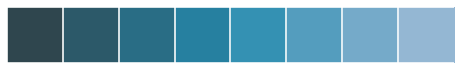

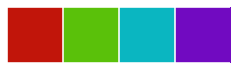

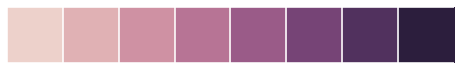

In [22]:
sns.palplot(sns.color_palette("PuBuGn_d", 8))
sns.palplot(sns.hls_palette(len(viirsdates), l=.4, s=.9))
sns.palplot(sns.cubehelix_palette(8))

In [28]:
current_palette = sns.color_palette(sns.hls_palette(len(alldates), l=.35, s=.9))
sns.set_palette(current_palette)
palette = itertools.cycle(sns.color_palette())
sns.set_context("poster", font_scale=1.6)

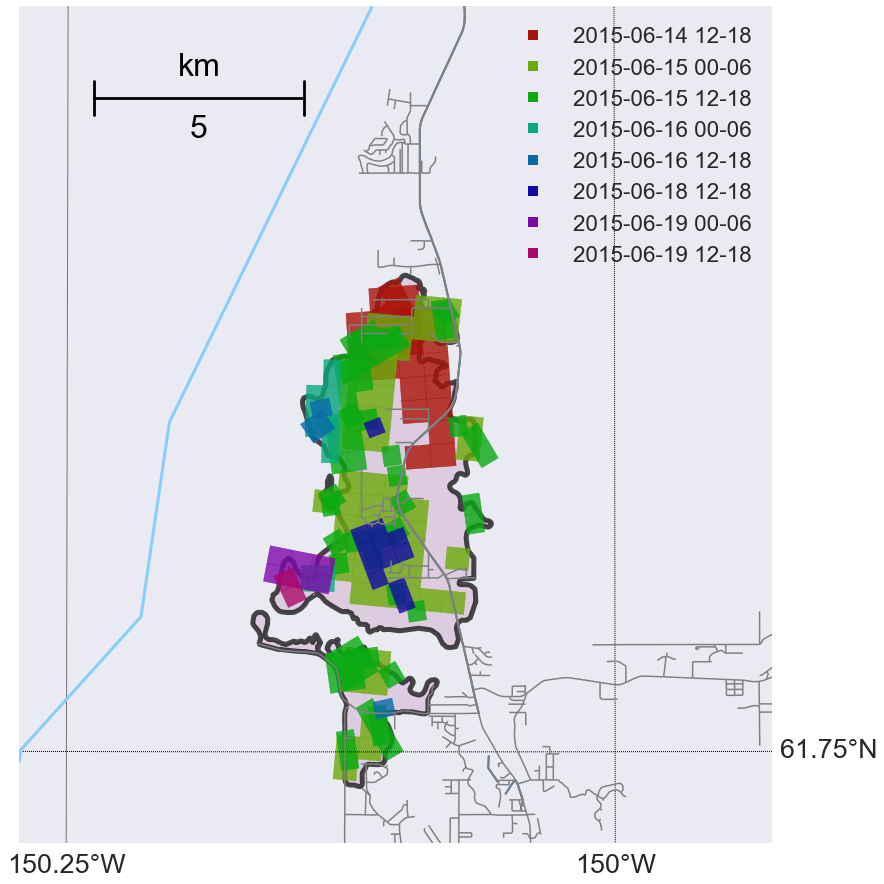

In [53]:
fig1 = plt.figure(1, figsize=(20, 15))
ax1 = fig1.add_subplot(111)
mm = Basemap(
    width=width, height=height, 
    resolution='i', 
    projection='aea', 
    lat_1=55., lat_2=65., lat_0=lat_0, lon_0=-150.1)
mm.drawrivers(color=water, linewidth=3, zorder=5)
mm.drawmeridians(np.arange(-180, 180, 0.25), labels=[False, False, False, 1])
mm.drawparallels(np.arange(0, 80, 0.25), labels=[False, True, False, False])
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=1.5, zorder=5)
mm.drawmapscale(-150.19, 61.89, -150.2, 61.89, 5, barstyle='simple', fontsize=32)
patches = []
for poly in willowperimdf.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor='orange', alpha=0.4, zorder=0)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor='thistle', edgecolor='k', 
                             linewidth=5, alpha=0.7, zorder=40)
            patches.append(p)
ax1.add_collection(PatchCollection(patches, match_original=True))

# empty list for dummy handles for labeling
handles = []
labels = []
# loop through datestamps
for datestmp in alldates:
    # get new color
    plotcolor = next(palette)
    # generate patches for this date stamp
    patches = []
    for firepoly in willownewviirsDF[
        willownewviirsDF.apply(akdt_datebucket_from_row, axis=1) == datestmp].geometry.values:
        firepixel = shapely.ops.transform(mm, firepoly)
        patches.append(PolygonPatch(firepixel, color=plotcolor, alpha=0.8, zorder=20))
    # make PatchCollection from patches and add to axes
    if patches:
        ax1.add_collection(PatchCollection(patches, match_original=True))
        # create dummy artist for labeling
        newartist = plt.Line2D([], [], color=plotcolor, marker='s', markersize=10, 
                               linestyle=None, linewidth=0, label=datestmp)
        handles.append(newartist)
        labels.append(datestmp)
plt.legend(handles, labels)
#ax1.set_title("2015 Sockeye Fire progression from VIIRS I-Band mid- and thermal IR SDS")

In [55]:
gisoutdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/GISout/'

In [ ]:
outfn = 'Fig11a_LR.png'
fig.savefig(os.path.join(gisoutdir, outfn), dpi=150, bb_inches='tight')

In [ ]:
outfn = 'Fig11a.png'
fig.savefig(os.path.join(gisoutdir, outfn), dpi=150, bb_inches='tight')

In [25]:
outdir = '/Users/cwaigl/Dropbox/Research/PhD/2015VIRSPaper/Sockeye_img/'
outfn = 'sockeye_gis_vifdahl_for_paper.png'
fig1.savefig(os.path.join(outdir, outfn), dpi=200, bbox_inches='tight')

In [26]:
current_palette = sns.color_palette(sns.hls_palette(len(alldates), l=.35, s=.9))
sns.set_palette(current_palette)
palette = itertools.cycle(sns.color_palette())
sns.set_context("poster", font_scale=1.4)

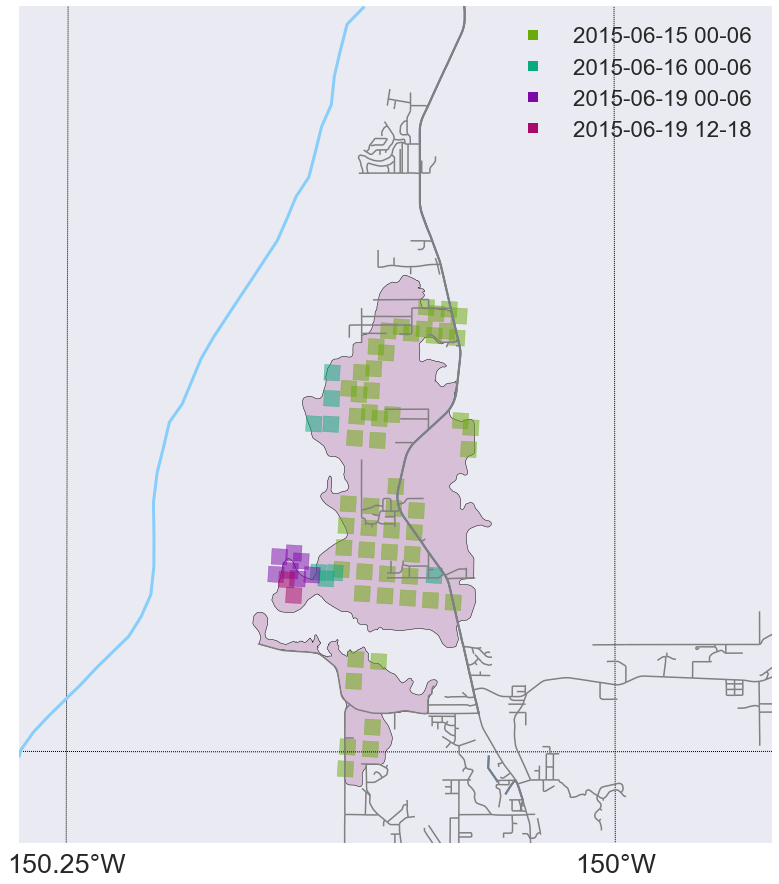

In [35]:
fig1 = plt.figure(1, figsize=(20, 15))
ax1 = fig1.add_subplot(111)
mm = Basemap(
    width=width, height=height, 
    resolution=resolution, 
    projection='aea', 
    lat_1=55., lat_2=65., lat_0=lat_0, lon_0=-150.1)
mm.drawrivers(color=water, linewidth=3, zorder=5)
mm.drawmeridians(np.arange(-180, 180, 0.25), labels=[False, False, False, 1])
mm.drawparallels(np.arange(0, 80, 0.25), labels=[False, False, False, False])
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=1.5, zorder=5)
#mm.drawcoastlines()
#mm.fillcontinents(        
#    color=earth,
#    lake_color=water)
#mm.drawmapboundary(fill_color=water)
patches = []
for poly in willowperimdf.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor='orange', alpha=0.4, zorder=10)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor='thistle', edgecolor='k', alpha=1, zorder=10)
            patches.append(p)
ax1.add_collection(PatchCollection(patches, match_original=True))

# empty list for dummy handles for labeling
handles = []
labels = []
# loop through datestamps
for datestmp in alldates:
    # get new color
    plotcolor = next(palette)
    # generate patches for this date stamp
    patches = []
    boxseries = gp.GeoSeries(map(makeboxes, willowviirsDF[
                willowviirsDF.apply(akdt_datebucket_from_row, axis=1) == datestmp
            ].geometry.values))
    boxseries.crs = viirsIDF.geometry.crs
    for item in boxseries.to_crs(epsg=4326):
        firepixel = shapely.ops.transform(mm, item)
        patches.append(PolygonPatch(firepixel, color=plotcolor, alpha=0.5, zorder=20))
    # make PatchCollection from patches and add to axes
    if patches:
        ax1.add_collection(PatchCollection(patches, match_original=True))
        # create dummy artist for labeling
        newartist = plt.Line2D([], [], color=plotcolor, marker='s', markersize=10, 
                               linestyle=None, linewidth=0, label=datestmp)
        handles.append(newartist)
        labels.append(datestmp)
plt.legend(handles, labels)
#ax1.set_title("2015 Sockeye Fire progression from VIIRS I-Band hotspot product")

In [36]:
outfn = 'sockeye_gis_viirsi_for_paper.png'
fig1.savefig(os.path.join(outdir, outfn), dpi=200, bbox_inches='tight')

In [29]:
current_palette = sns.color_palette(sns.hls_palette(len(alldates), l=.35, s=.9))
sns.set_palette(current_palette)
palette = itertools.cycle(sns.color_palette())
sns.set_context("poster", font_scale=1.4)

In [33]:
def makecustomboxfromrow(row):
    return makebox(row['geometry'], a=row['SPIX']*1000, b=row['TPIX']*1000)

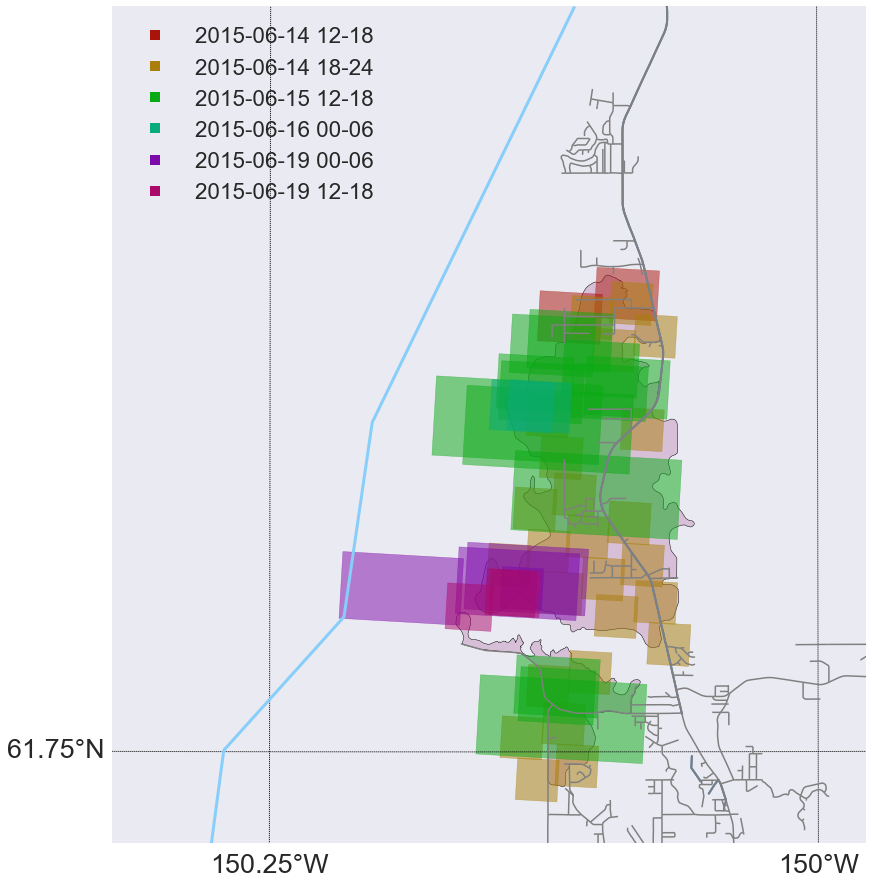

In [42]:
fig1 = plt.figure(1, figsize=(20, 15))
ax1 = fig1.add_subplot(111)
mm = Basemap(
    width=width, height=height, 
    resolution='i', 
    projection='aea', 
    lat_1=55., lat_2=65., lat_0=lat_0, lon_0=-150.15)
#mm.drawcoastlines()
mm.drawrivers(color=water, linewidth=3, zorder=5)
mm.drawmeridians(np.arange(-180, 180, 0.25), labels=[False, False, False, 1])
mm.drawparallels(np.arange(0, 80, 0.25), labels=[True, False, False, False])
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=1.5, zorder=5)
#mm.fillcontinents(        
#    color=earth,
#    lake_color=water)
#mm.drawmapboundary(fill_color=water)
patches = []
for poly in willowperimdf.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor='orange', alpha=0.4, zorder=10)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor='thistle', edgecolor='k', alpha=1, zorder=10)
            patches.append(p)
ax1.add_collection(PatchCollection(patches, match_original=True))

# empty list for dummy handles for labeling
handles = []
labels = []
# loop through datestamps
for datestmp in alldates:
    # get new color
    plotcolor = next(palette)
    # generate patches for this date stamp
    patches = []
    filteredDF = willowmodisDF[
            willowmodisDF.apply(akdt_datebucket_from_row, axis=1) == datestmp
            ]
    if not filteredDF.empty:
        boxseries = gp.GeoSeries(willowmodisDF[
                willowmodisDF.apply(akdt_datebucket_from_row, axis=1) == datestmp
                ].apply(makecustomboxfromrow, axis=1))
        boxseries.crs = willowmodisDF.geometry.crs
        for item in boxseries.to_crs(epsg=4326):
            firepixel = shapely.ops.transform(mm, item)
            patches.append(PolygonPatch(firepixel, color=plotcolor, alpha=0.5, zorder=20))
        # make PatchCollection from patches and add to axes
        ax1.add_collection(PatchCollection(patches, match_original=True))
        # create dummy artist for labeling
        newartist = plt.Line2D([], [], color=plotcolor, marker='s', markersize=10, 
                               linestyle=None, linewidth=0, label=datestmp)
        handles.append(newartist)
        labels.append(datestmp)
plt.legend(handles, labels, loc=2)
#ax1.set_title("2015 Sockeye Fire progression from MOD14 hotspot product")

In [34]:
outfn = 'sockeye_gis_modis_for_paper.png'
fig1.savefig(os.path.join(outdir, outfn), dpi=200, bbox_inches='tight')

In [38]:
sns.set_context("poster", font_scale=1.4)

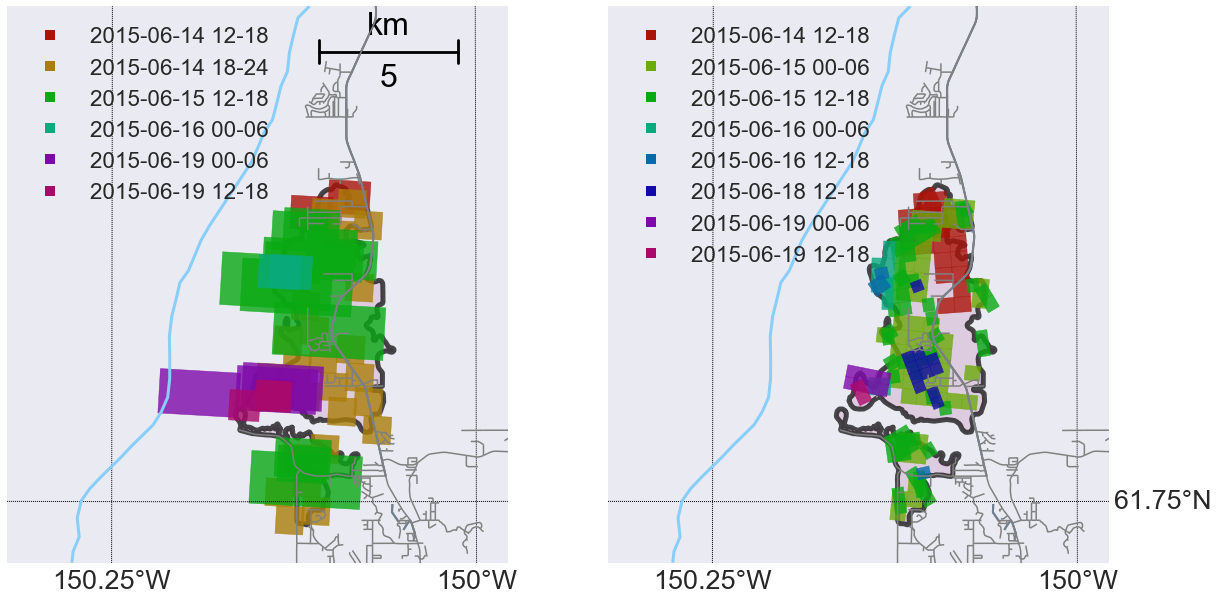

In [62]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 10))

# left 
mm = Basemap(
    width=width, height=height, 
    resolution=resolution, 
    projection='aea', 
    lat_1=55., lat_2=65., lat_0=lat_0, lon_0=-150.15,
    ax=ax0)
mm.drawrivers(color=water, linewidth=3, zorder=5)
mm.drawmeridians(np.arange(-180, 180, 0.25), labels=[False, False, False, 1])
mm.drawparallels(np.arange(0, 80, 0.25), labels=[False, False, False, False])
mm.drawmapscale(-150.06, 61.895, -150.2, 61.89, 5, barstyle='simple', fontsize=32)
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=1.5, zorder=5)
patches = []
for poly in willowperimdf.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor='orange', alpha=0.4, zorder=10)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor='thistle', edgecolor='k', 
                             linewidth=5, alpha=0.7, zorder=40)
            patches.append(p)
ax0.add_collection(PatchCollection(patches, match_original=True))

# empty list for dummy handles for labeling
handles = []
labels = []
# loop through datestamps
for datestmp in alldates:
    # get new color
    plotcolor = next(palette)
    # generate patches for this date stamp
    patches = []
    filteredDF = willowmodisDF[
            willowmodisDF.apply(akdt_datebucket_from_row, axis=1) == datestmp
            ]
    if not filteredDF.empty:
        boxseries = gp.GeoSeries(willowmodisDF[
                willowmodisDF.apply(akdt_datebucket_from_row, axis=1) == datestmp
                ].apply(makecustomboxfromrow, axis=1))
        boxseries.crs = willowmodisDF.geometry.crs
        for item in boxseries.to_crs(epsg=4326):
            firepixel = shapely.ops.transform(mm, item)
            patches.append(PolygonPatch(firepixel, color=plotcolor, alpha=0.8, zorder=20))
        # make PatchCollection from patches and add to axes
        ax0.add_collection(PatchCollection(patches, match_original=True))
        # create dummy artist for labeling
        newartist = plt.Line2D([], [], color=plotcolor, marker='s', markersize=10, 
                               linestyle=None, linewidth=0, label=datestmp)
        handles.append(newartist)
        labels.append(datestmp)
ax0.legend(handles, labels, loc=2)


# right
mm = Basemap(
    width=width, height=height, 
    resolution=resolution, 
    projection='aea', 
    lat_1=55., lat_2=65., lat_0=lat_0, lon_0=-150.15,
    ax=ax1)
mm.drawrivers(color=water, linewidth=3, zorder=5)
mm.drawmeridians(np.arange(-180, 180, 0.25), labels=[False, False, False, 1])
mm.drawparallels(np.arange(0, 80, 0.25), labels=[False, True, False, False])
mm.readshapefile(
    mainroads, 
    'roads', 
    color="slategrey", linewidth=2)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=1.5, zorder=5)
patches = []
for poly in willowperimdf.to_crs(epsg=4326).geometry.values:
    transpoly = shapely.ops.transform(mm, poly)
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(transpoly, facecolor='orange', alpha=0.4, zorder=10)
        patches.append(p)
    elif poly.geom_type == 'MultiPolygon':
        for single in transpoly:
            p = PolygonPatch(single, facecolor='thistle', edgecolor='k', 
                             linewidth=5, alpha=0.7, zorder=40)
            patches.append(p)
ax1.add_collection(PatchCollection(patches, match_original=True))

# empty list for dummy handles for labeling
handles = []
labels = []
# loop through datestamps
for datestmp in alldates:
    # get new color
    plotcolor = next(palette)
    # generate patches for this date stamp
    patches = []
    for firepoly in willownewviirsDF[
        willownewviirsDF.apply(akdt_datebucket_from_row, axis=1) == datestmp].geometry.values:
        firepixel = shapely.ops.transform(mm, firepoly)
        patches.append(PolygonPatch(firepixel, color=plotcolor, alpha=0.8, zorder=20))
    # make PatchCollection from patches and add to axes
    if patches:
        ax1.add_collection(PatchCollection(patches, match_original=True))
        # create dummy artist for labeling
        newartist = plt.Line2D([], [], color=plotcolor, marker='s', markersize=10, 
                               linestyle=None, linewidth=0, label=datestmp)
        handles.append(newartist)
        labels.append(datestmp)
plt.legend(handles, labels, loc=2)
plt.subplots_adjust(bottom=0.05, left=0.05, right=0.9)

In [63]:
outfn = 'Fig11_LR.png'
fig.savefig(os.path.join(gisoutdir, outfn), dpi=150, bb_inches='tight')

In [64]:
outfn = 'Fig11.png'
fig.savefig(os.path.join(gisoutdir, outfn), dpi=300, bb_inches='tight')

In [34]:
cleanedfireperimDF.crs

{u'datum': u'NAD83',
 u'lat_0': 50,
 u'lat_1': 55,
 u'lat_2': 65,
 u'lon_0': -154,
 u'no_defs': True,
 u'proj': u'aea',
 u'units': u'm',
 u'x_0': 0,
 u'y_0': 0}

In [35]:
mod14DF.crs

{u'datum': u'NAD83',
 u'lat_0': 50,
 u'lat_1': 55,
 u'lat_2': 65,
 u'lon_0': -154,
 u'no_defs': True,
 u'proj': u'aea',
 u'units': u'm',
 u'x_0': 0,
 u'y_0': 0}

In [36]:
willowperimdf.crs

{u'datum': u'NAD83',
 u'lat_0': 50,
 u'lat_1': 55,
 u'lat_2': 65,
 u'lon_0': -154,
 u'no_defs': True,
 u'proj': u'aea',
 u'units': u'm',
 u'x_0': 0,
 u'y_0': 0}

In [84]:
len(willownewviirsDF)

176